# Lectura i processament de dades

# LLibreries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

import json
import os

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Preparació de dades

In [4]:
# Directori de treball

# Ruta on esta el script actual
# __path__ = os.path.dirname(os.path.realpath(__file__)) # Si es fitxer .py
__path__ = os.getcwd() # Si es fitxer .ipynb

carpeta_dades = 'Dades_T_estacions_xema_Z1'
fitxer_dades = 'SCM_T_Z1.json'

path_dades = os.path.join(__path__, carpeta_dades, fitxer_dades)

# Obrir un arxiu json per veure com esta estructurat i com organitzar les dades
with open(path_dades, 'r') as f:
    data = json.load(f)

# Accedemos a las lecturas (temperaturas) del JSON
lecturas = data[0]['variables'][0]['lectures']

# Convertimos las lecturas a un DataFrame con solo las columnas necesarias
df = pd.DataFrame(lecturas)[['data', 'valor']]


# Convertimos la columna 'data' a tipo datetime para análisis posterior
df['data'] = pd.to_datetime(df['data'], utc=True)

df = df.sort_values(by='data')

# Eliminem les dades que estan entre hores, es a dir en minuts que no son 0
df = df[df['data'].dt.minute == 0]

# Restablir l'index
df = df.reset_index(drop=True)


In [5]:
df.sample(10)  # Mostrem 10 mostres aleatòries del DataFrame

,data,valor
57990,2005-04-22 06:00:00+00:00,2.90
210909,2022-10-27 08:00:00+00:00,11.10
138571,2014-07-23 03:00:00+00:00,5.80
20787,2000-12-27 07:00:00+00:00,-6.10
30494,2002-02-12 05:00:00+00:00,3.90
102588,2010-06-14 20:00:00+00:00,-0.30
223152,2024-03-20 11:00:00+00:00,8.90
187984,2020-03-16 03:00:00+00:00,-2.00
96318,2009-09-26 14:00:00+00:00,11.00
172124,2018-05-21 04:00:00+00:00,2.80


In [6]:
# Guardar el DataFrame en un fitxer CSV per llegir-lo en els altres scripts directament
path_csv = os.path.join(__path__, carpeta_dades, 'SCM_T_Z1.csv')
df.to_csv(path_csv, index=False)

# Visualització de dades

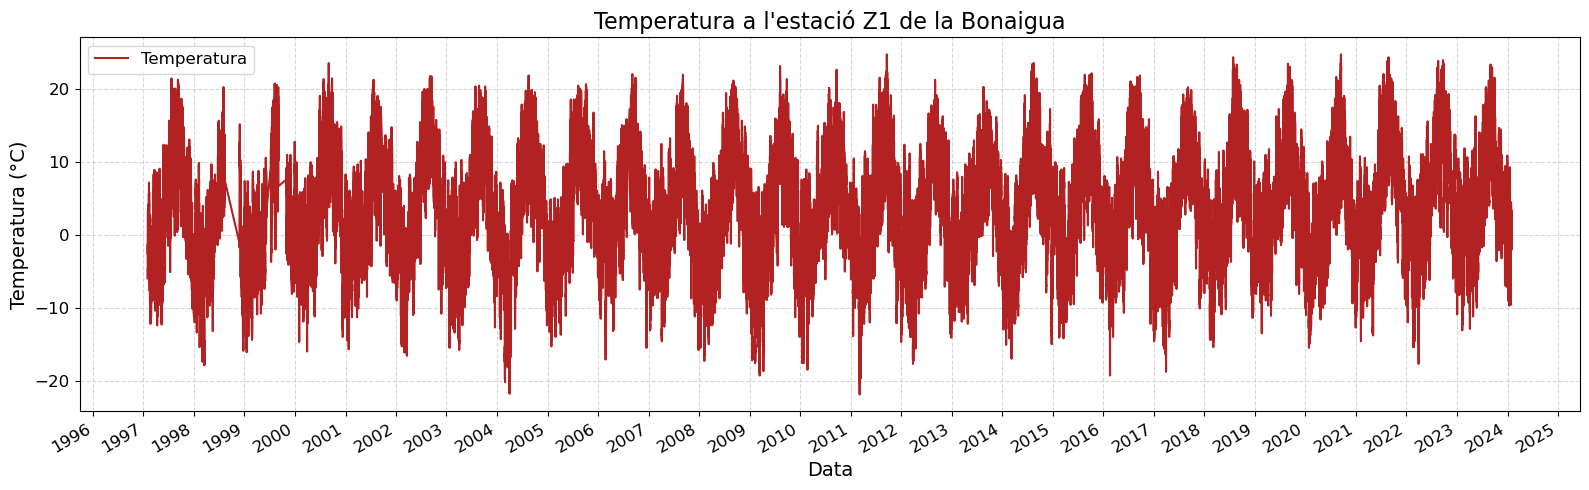

In [8]:
# Grafic de les dades

plt.figure(figsize=(16, 5))
plt.plot(df['data'], df['valor'], label='Temperatura', color='firebrick', linewidth=1.5)

# Millores visuals
plt.title('Temperatura a l\'estació Z1 de la Bonaigua', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Temperatura (°C)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)

# Format de dates a l'eix X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()



Trams sense dades:


,min,max,hores_faltants
grup,,,
1,1998-05-13 03:00:00+00:00,1998-05-13 03:00:00+00:00,1.00
2,1998-07-14 09:00:00+00:00,1998-07-14 09:00:00+00:00,1.00
3,1998-08-30 03:00:00+00:00,1998-08-30 06:00:00+00:00,4.00
4,1998-08-30 23:00:00+00:00,1998-08-31 05:00:00+00:00,7.00
5,1998-08-31 21:00:00+00:00,1998-09-01 06:00:00+00:00,10.00
6,1998-09-01 20:00:00+00:00,1998-09-02 05:00:00+00:00,10.00
7,1998-09-02 20:00:00+00:00,1998-09-03 05:00:00+00:00,10.00
8,1998-09-03 19:00:00+00:00,1998-09-04 05:00:00+00:00,11.00
9,1998-09-04 07:00:00+00:00,1998-09-05 05:00:00+00:00,23.00


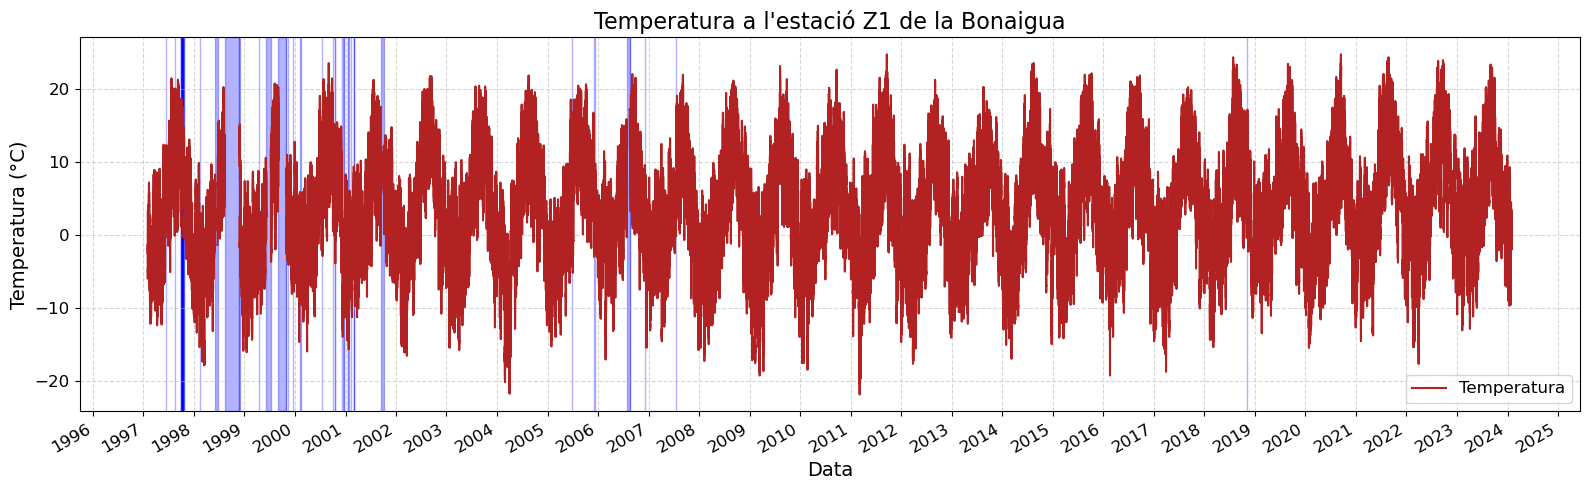

Mostrant el DataFrame complet amb totes les hores i les dades de temperatura:


,data,valor
64231,2005-04-30 07:00:00+00:00,7.80
46766,2003-05-03 14:00:00+00:00,10.40
173990,2017-11-06 14:00:00+00:00,-7.30
49817,2003-09-07 17:00:00+00:00,5.20
215974,2022-08-21 22:00:00+00:00,10.00
90944,2008-05-17 08:00:00+00:00,2.10
148374,2014-12-05 06:00:00+00:00,-6.20
90826,2008-05-12 10:00:00+00:00,2.60
225699,2023-10-01 03:00:00+00:00,13.10
173462,2017-10-15 14:00:00+00:00,13.00


Mostrant les primeres files amb valors NaN:


,data,valor
3171,1998-05-13 03:00:00+00:00,NaN
4665,1998-07-14 09:00:00+00:00,NaN
5787,1998-08-30 03:00:00+00:00,NaN
5788,1998-08-30 04:00:00+00:00,NaN
5789,1998-08-30 05:00:00+00:00,NaN
5790,1998-08-30 06:00:00+00:00,NaN
5807,1998-08-30 23:00:00+00:00,NaN
5808,1998-08-31 00:00:00+00:00,NaN
5809,1998-08-31 01:00:00+00:00,NaN
5810,1998-08-31 02:00:00+00:00,NaN


In [44]:
# Suposem que df és el DataFrame original amb columnes ['data', 'valor']

# Crear rang horari complet i fusionar per tenir df_complet
rang_complet = pd.date_range(start=df['data'].min(), end=df['data'].max(), freq='H')
df_complet = pd.DataFrame({'data': rang_complet}).merge(df, on='data', how='left')

# Identificar trams consecutius amb NaN (sense crear df_falten explícitament)
trams = (
    df_complet[df_complet['valor'].isna()]
    .assign(grup=lambda x: (x['data'].diff() != pd.Timedelta(hours=1)).cumsum())
    .groupby('grup')['data']
    .agg(['min', 'max'])
    .assign(hores_faltants=lambda x: ((x['max'] - x['min']) / pd.Timedelta(hours=1)) + 1)
)

# Mostrar trams
print("Trams sense dades:")
display(trams)

# Gràfic
plt.figure(figsize=(16, 5))
plt.plot(df_complet['data'], df_complet['valor'], label='Temperatura', color='firebrick', linewidth=1.5)

# Ressaltar períodes buits
for _, fila in trams.iterrows():
    plt.axvspan(fila['min'], fila['max'], color='blue', alpha=0.3)

# Estètica
plt.title("Temperatura a l'estació Z1 de la Bonaigua", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Temperatura (°C)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)

# Format de l’eix X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# Mostra aleatòria i mostres amb NaN
print("Mostrant el DataFrame complet amb totes les hores i les dades de temperatura:")
display(df_complet.sample(10))

print("Mostrant les primeres files amb valors NaN:")
display(df_complet[df_complet['valor'].isna()].head(10))
